# EDA Project - Netflix dataset

In this project we will get into a **basic view** of a dataset in order to do some EDA (Exploratory Data Analysis). A 2021 Netflix catalog dataset will be used so it will be an easy way to show a tangible information to most of people. In this project we will be able to: 
* **describe a dataset with all its columns' types and values**
* **check if there are missing values and how to manage them**
* **do some basic visualizations for a better understanding of the data**

<img src=https://sobresagas.com.br/wp-content/uploads/2020/12/Netflix.png style="height: 550px"/>

The dataset used on this project can be downloaded in [Kaggle](https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data). 

## 0. Importing the libraries

In [1]:
#basic labraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Collecting data

In [2]:
df = pd.read_csv(r"C:\Users\LUCASCAMPOSTEBET\Downloads\netflix_titles_2021.csv")

## 2. Exploring data

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.shape

(8807, 12)

We can have the first impressions with the dataset in this tiny sample, with a total of 8,807 entries (rows) and 12 columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Just with this information, we can already see 3 main points:
1. there are missing values, specially on columns _director_, _cast_ and _country_
2. columns such as _date_added_ and _duration_ don't have their type correctly. We'll need to convert into a number and a date type
3. columns such as _country_ and _listed_in_ have a list of strings. We'll need to split them 

## 3. Cleaning and transforming data

### 3.1. Dealing with missing data
Knowing that in this analysis we will only consider the "show_id", "type", "country", "date_added", "release_year" and "duration" columns, we disregard the other columns even if they have missing values.  

In [6]:
df = df.dropna(
    axis=0, #row drop
    how='any', #case 'any' value is missing, drop the row
    subset=['country', 'date_added', 'duration']) #considered columns with missing values
df.shape

(7964, 12)

### 3.2. Changing column's types
_date_added_ needs to be converted into **date** and _duration_ needs to be converted into **numeric** type.

#### 3.2.1. Converting a string into a date

In [7]:
df["date_added"]=pd.to_datetime(df['date_added'])

#### 3.2.2. Converting a string into a number (splitting)

In [8]:
df['duration_num'] = pd.to_numeric(df['duration'].str.split(" ",0).str.get(0))

### 3.3. Splitting string columns

#### 3.3.1 Splitting _country_ column

In [9]:
#Firstly we will check what the maximum number of listed countries in 1 entry is
#Knowing that now we got 7.964 entries, getting the the 5 countries is pretty enough in this analysis, which represents 99.3% of the new dataset
for i in range(10):
    print(df['country'].str.split(", ").str.get(i).isnull().sum())

0
6648
7517
7790
7905
7941
7955
7960
7962
7962


In [10]:
#Creating 5 new columns for the countries
df['country1'] = df['country'].str.split(", ").str.get(0)
df['country2'] = df['country'].str.split(", ").str.get(1)
df['country3'] = df['country'].str.split(", ").str.get(2)
df['country4'] = df['country'].str.split(", ").str.get(3)
df['country5'] = df['country'].str.split(", ").str.get(4)

#### 3.3.2. Splitting _listed_in_ column

In [11]:
#By the same process, we can see that there are a maximum of 3 genres in each row 
for i in range(5):
    print(df['listed_in'].str.split(", ").str.get(i).isnull().sum())

0
1774
4539
7964
7964


In [12]:
#Creating 3 new columns for the genres
df['genre1'] = df['listed_in'].str.split(", ").str.get(0)
df['genre2'] = df['listed_in'].str.split(", ").str.get(1)
df['genre3'] = df['listed_in'].str.split(", ").str.get(2)

To sum it all up, by now we have:
1. dealt with the missing values
2. converted into corrected types
3. created new columns in order to handle with numeric values and also simple values instead of list values

Below there is the final result of the dataframe and all the changes we have done with the original one. Of course that we still can add columns or change a little later, but from now on we are ready to move forward to the next steps and create some visualization!

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,duration_num,country1,country2,country3,country4,country5,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",90,United States,NaN,NaN,NaN,NaN,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2,South Africa,NaN,NaN,NaN,NaN,International TV Shows,TV Dramas,TV Mysteries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2,India,NaN,NaN,NaN,NaN,International TV Shows,Romantic TV Shows,TV Comedies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,"On a photo shoot in Ghana, an American model s...",125,United States,Ghana,Burkina Faso,United Kingdom,Germany,Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,...,A talented batch of amateur bakers face off in...,9,United Kingdom,NaN,NaN,NaN,NaN,British TV Shows,Reality TV,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7964 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7964 non-null   object        
 1   type          7964 non-null   object        
 2   title         7964 non-null   object        
 3   director      5748 non-null   object        
 4   cast          7293 non-null   object        
 5   country       7964 non-null   object        
 6   date_added    7964 non-null   datetime64[ns]
 7   release_year  7964 non-null   int64         
 8   rating        7961 non-null   object        
 9   duration      7964 non-null   object        
 10  listed_in     7964 non-null   object        
 11  description   7964 non-null   object        
 12  duration_num  7964 non-null   int64         
 13  country1      7964 non-null   object        
 14  country2      1316 non-null   object        
 15  country3      447 non-null    object  

## 4. Visualizing data
In this chapter, we want to show a few graphics to have a better understanding of the data:
1. Number of movies and TV shows
2. Top genres
3. Top countries
4. Duration ranges

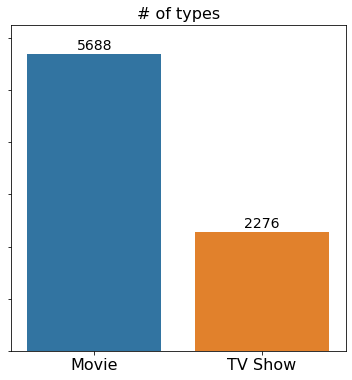

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(
    data=df.groupby('type', as_index=False).agg({'show_id':'count'}), 
    x='type', 
    y='show_id',
    ax=ax
)

#Editing the plot
ax.set(
    title='Types',
    xlabel=None, #remove X axis
    ylabel=None, #remove Y axis
    #Setting the max value of Y axis as 10% bigger than the maximum value so all the labels are able to be seen
    ylim=(0, max(df.groupby('type').agg({'show_id':'count'}).values)*1.1),
    yticklabels=[] #remove axis labels
)

ax.set_title('# of types', fontdict={'fontsize': 16}) #plot title and its size
ax.tick_params(axis='x', labelsize=16) #x label size

#Adding bar labels
for p in ax.patches:
    height=p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height+100,
        s='{:.0f}'.format(height),
        ha='center',
        size=14)

plt.show()

In [16]:
#Creating a dataframe for all genres
genre = pd.concat([
    df.rename(columns={"genre1": "genre"}).groupby('genre').agg({'show_id':'count'}),
    df.rename(columns={"genre2": "genre"}).groupby('genre').agg({'show_id':'count'}),
    df.rename(columns={"genre3": "genre"}).groupby('genre').agg({'show_id':'count'})
              ])

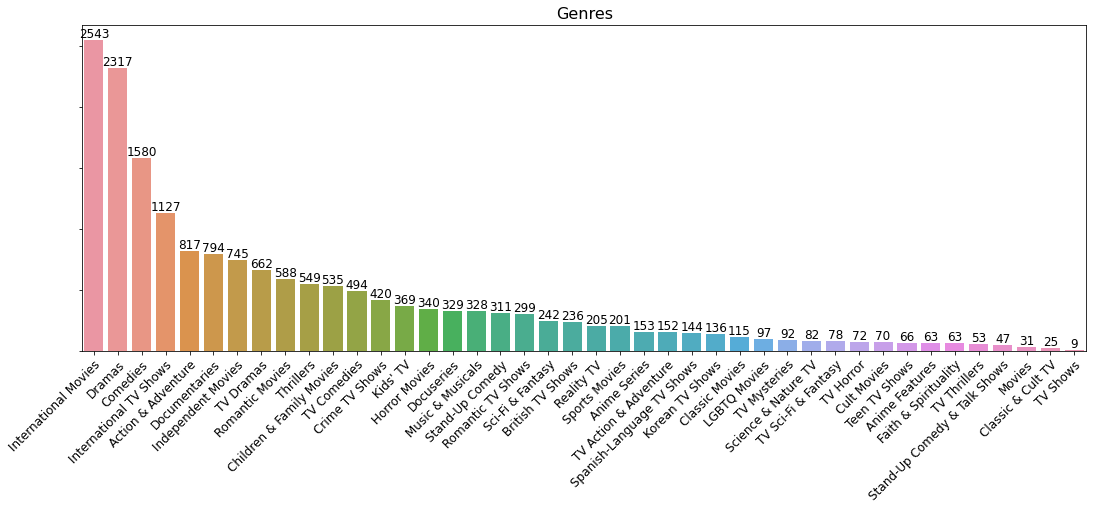

In [17]:
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(
    data=genre.groupby('genre').agg({'show_id':'sum'}).sort_values(by='show_id', ascending=False), 
    x=genre.groupby('genre').agg({'show_id':'sum'}).sort_values(by='show_id', ascending=False).index, 
    y='show_id',
    ax=ax
)

#Editing the plot
ax.set(
    xlabel=None, #remove X axis
    ylabel=None, #remove Y axis
    yticklabels=[] #remove axis labels
)

ax.set_title('Genres', fontdict={'fontsize': 16}) #plot title and its size
ax.tick_params(axis='x', labelsize=12) #x label size
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") #rotating the x labels

#Adding bar labels
for p in ax.patches:
    height=p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height+20,
        s='{:.0f}'.format(height),
        ha='center',
        size=12)

plt.show()

In [18]:
#Creating a dataframe for all countries
countries = pd.concat([
    df.rename(columns={'country1': 'country_'}).groupby('country_').agg({'show_id':'count'}),
    df.rename(columns={'country2': 'country_'}).groupby('country_').agg({'show_id':'count'}),
    df.rename(columns={'country3': 'country_'}).groupby('country_').agg({'show_id':'count'}),
    df.rename(columns={'country4': 'country_'}).groupby('country_').agg({'show_id':'count'}),
    df.rename(columns={'country5': 'country_'}).groupby('country_').agg({'show_id':'count'})
              ])
countries = countries.groupby('country_').agg({'show_id':'sum'}).sort_values(by='show_id', ascending=False)

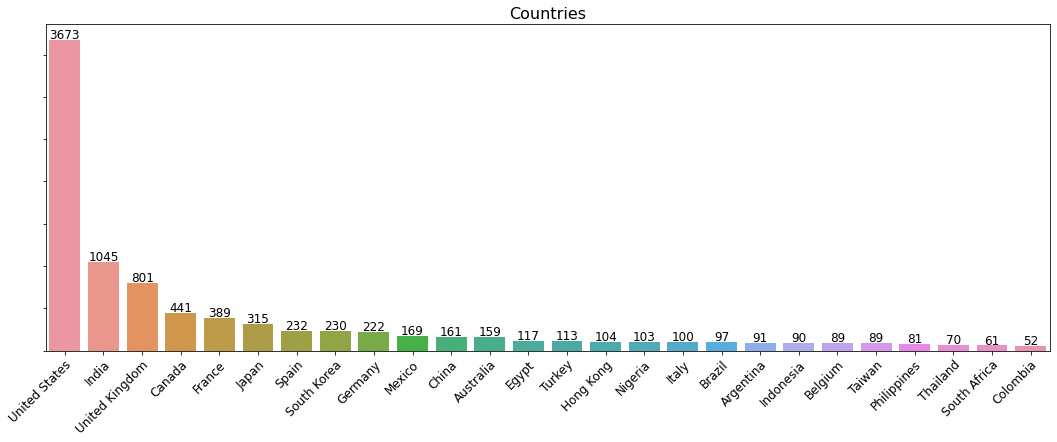

In [19]:
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(
    data=countries[countries['show_id']>50], 
    x=countries[countries['show_id']>50].index, 
    y='show_id',
    ax=ax
)

#Editing the plot
ax.set(
    xlabel=None, #remove X axis
    ylabel=None, #remove Y axis
    yticklabels=[] #remove axis labels
)

ax.set_title('Countries', fontdict={'fontsize': 16}) #plot title and its size
ax.tick_params(axis='x', labelsize=12) #x label size
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") #rotating the x labels

#Adding bar labels
for p in ax.patches:
    height=p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height+20,
        s='{:.0f}'.format(height),
        ha='center',
        size=12)

plt.show()

For the duration of movies, we will consider ranges of 30 minutes. For TV series, we will keep the number of seasons.

In [20]:
#creation of a dataframe specifically for Movies 
df_m = df[(df['type']=='Movie')]

In [21]:
#defining the ranges by 30 minutes interval
df_m['dur_range'] = np.where(df_m['duration_num']<60, '1. less than 60 minutes',
                np.where(df_m['duration_num']<90, '2. between 60 and 89 minutes',
                np.where(df_m['duration_num']<120, '3. between 90 and 119 minutes',
                np.where(df_m['duration_num']<150, '4. between 120 and 149 minutes',
                np.where(df_m['duration_num']<180, '5. between 150 and 179 minutes', '6. 180 minutes or more')))))

C:\Users\LUCASCAMPOSTEBET\AppData\Local\Temp\ipykernel_19864\4279764528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['dur_range'] = np.where(df_m['duration_num']<60, '1. less than 60 minutes',


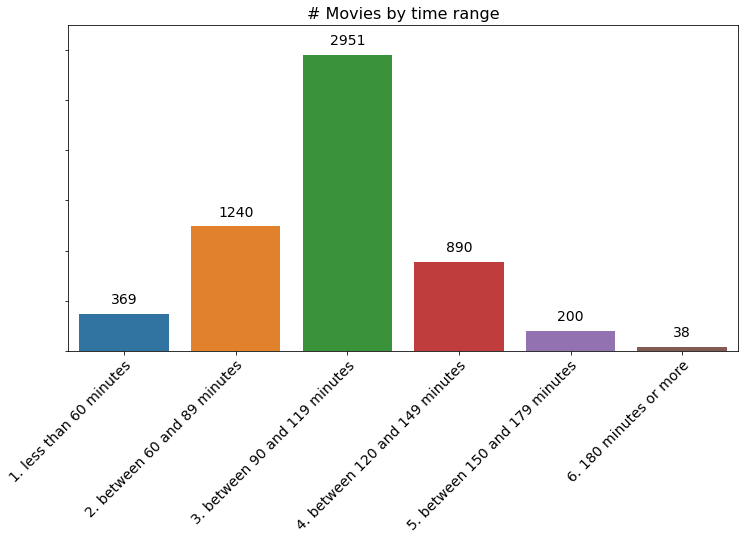

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(
    data=df_m.groupby('dur_range', as_index=False).agg({'show_id':'count'}), 
    x='dur_range', 
    y='show_id',
    ax=ax
)

#Editing the plot
ax.set(
    xlabel=None, #remove X axis
    ylabel=None, #remove Y axis
    yticklabels=[], #remove axis labels
    #Setting the max value of Y axis as 10% bigger than the maximum value so the all the labels are able to be seen
    ylim=(0, max(df_m.groupby('dur_range', as_index=False).agg({'show_id':'count'})['show_id'].values)*1.1),
)

ax.set_title('# Movies by time range', fontdict={'fontsize': 16}) #plot title and its size
ax.tick_params(axis='x', labelsize=14) #x label size
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") #rotating the x labels

#Adding bar labels
for p in ax.patches:
    height=p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height+100,
        s='{:.0f}'.format(height),
        ha='center',
        size=14)

plt.show()

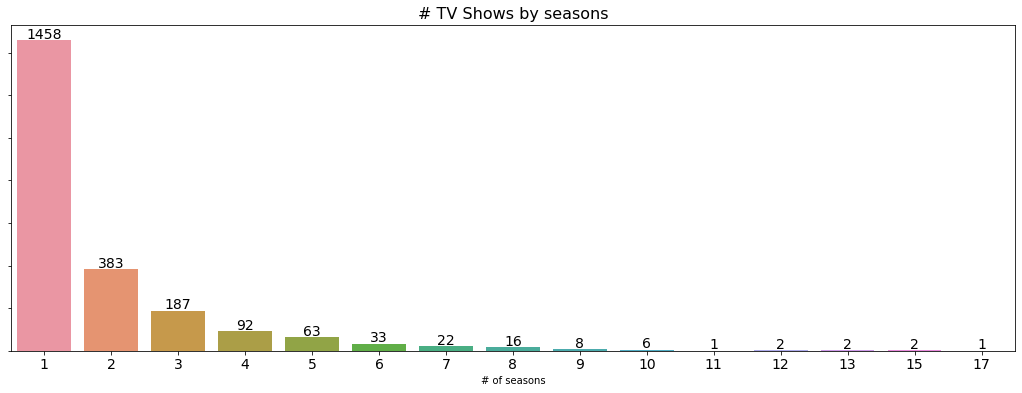

In [23]:
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(
    data=df[df['type']=='TV Show'].groupby('duration_num', as_index=False).agg({'show_id':'count'}).sort_values('duration_num', ascending=True), 
    x='duration_num', 
    y='show_id',
    ax=ax
)

#Editing the plot
ax.set(
    xlabel='# of seasons', #remove X axis
    ylabel=None, #remove Y axis
    yticklabels=[], #remove axis labels
)

ax.set_title('# TV Shows by seasons', fontdict={'fontsize': 16}) #plot title and its size
ax.tick_params(axis='x', labelsize=14) #x label size

#Adding bar labels
for p in ax.patches:
    height=p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height+10,
        s='{:.0f}'.format(height),
        ha='center',
        size=14)

plt.show()

## 5. Conclusion

In this project, we were able to do some very cool stuff, such as exploring, manipulating and visualizing the data.

By **exploring** the data, we could:
* take a look at a sample of the dataframe
* check all its variables and their types, which is important to know if we will need to change them later
* see the size of the dataframe
* check if there were empty values and how to deal with them

By **manipulating** the data, we could:
* create new columns in order to have the right information to be plotted later
* change the types of some variables

Finally, with the **visual information**, we are able to get some insights of the data and answer questions such as:
* check which are the most popular genres
* which type is more common: Movies or TV Shows?
* how many seasons does a TV Show normally have? 
* and many others insights just using this dataset